In [32]:
# 1) Imports & config
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
# Make sure an 'images' folder exists
os.makedirs("images", exist_ok=True)

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120


In [9]:
# 2) Load dataset
df = pd.read_csv("../data/netflix_titles.csv")
print("Shape:", df.shape)
print(df.head())

Shape: (8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Septembe

In [10]:
# 3)Missing values & duplicates
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
Duplicates: 0


In [ ]:
# 4)Clean data
df["country"] = df["country"].fillna("Unknown")
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year
df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce")
df["listed_in"] = df["listed_in"].fillna("Unknown")
df["primary_genre"] = df["listed_in"].apply(lambda x: x.split(",")[0])Clean data
df["country"] = df["country"].fillna("Unknown")
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year
df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce")
df["listed_in"] = df["listed_in"].fillna("Unknown")
df["primary_genre"] = df["listed_in"].apply(lambda x: x.split(",")[0])

In [11]:
# 5)Quick stats
print("Total:", len(df))
print(df["type"].value_counts())
print("Top countries:\n", df["country"].str.split(",").explode().value_counts().head())
print("Top genres:\n", df["listed_in"].str.split(",").explode().value_counts().head())

Total: 8807
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
Top countries:
 country
United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Name: count, dtype: int64
Top genres:
 listed_in
 International Movies    2624
Dramas                   1600
Comedies                 1210
Action & Adventure        859
Documentaries             829
Name: count, dtype: int64


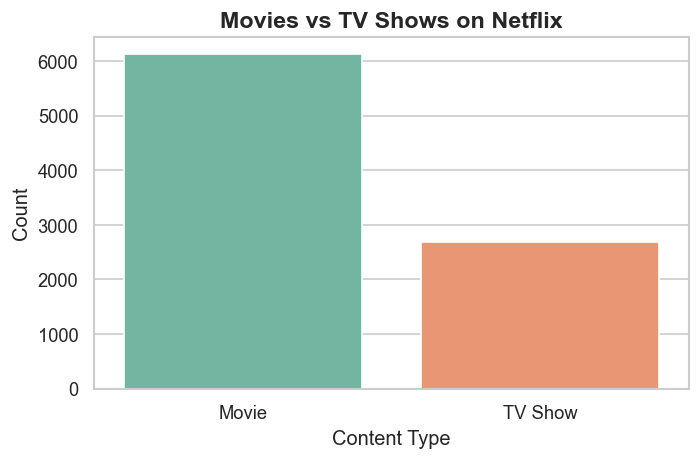

In [28]:
# 6) Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, palette="Set2")
plt.title("Movies vs TV Shows on Netflix", fontsize=14, weight="bold")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("images/movies_vs_tvshows.png", dpi=300)
plt.show()

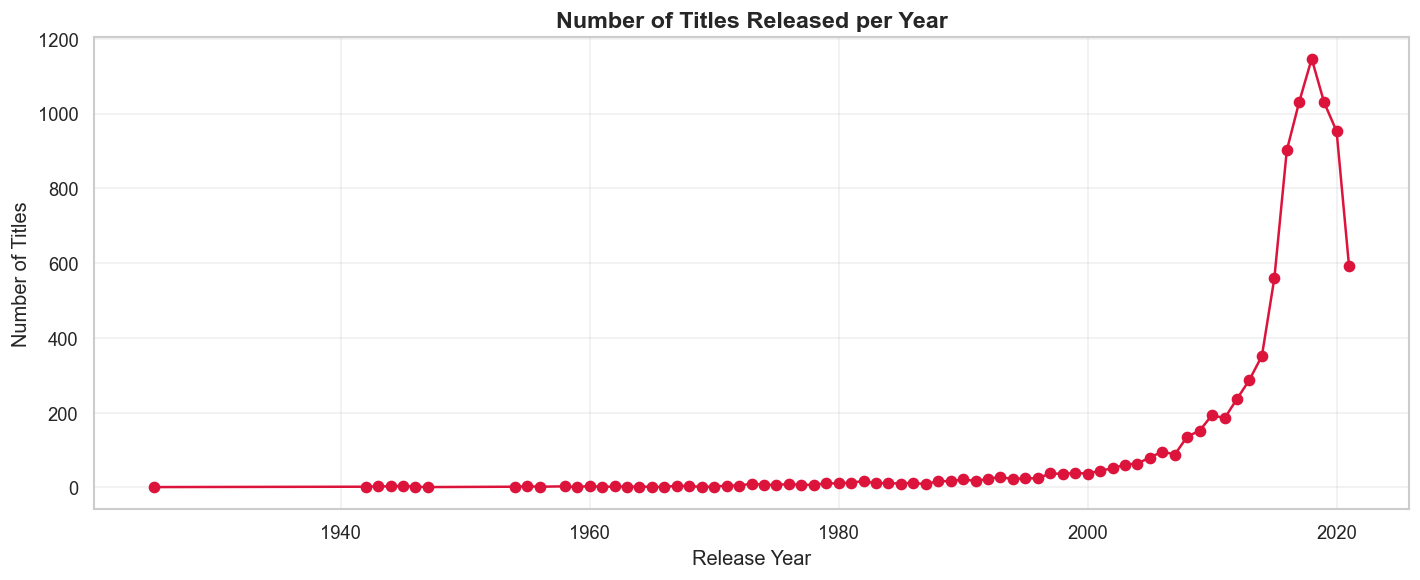

In [29]:
# 7) Releases per Year
plt.figure(figsize=(12,5))
year_counts = df["release_year"].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker="o", color="crimson")
plt.title("Number of Titles Released per Year", fontsize=14, weight="bold")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("images/releases_per_year.png", dpi=300)
plt.show()

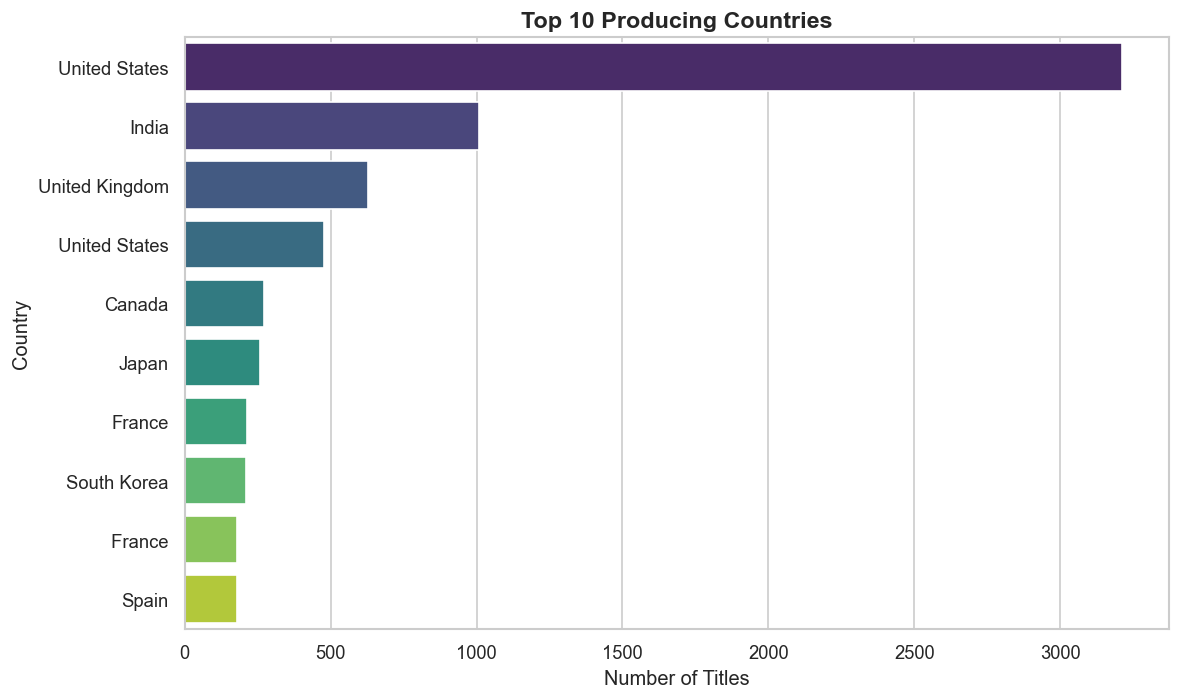

In [30]:
# 8) Top 10 Producing Countries
plt.figure(figsize=(10,6))
top_countries = df["country"].str.split(",").explode().value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Producing Countries", fontsize=14, weight="bold")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("images/top_countries.png", dpi=300)
plt.show()


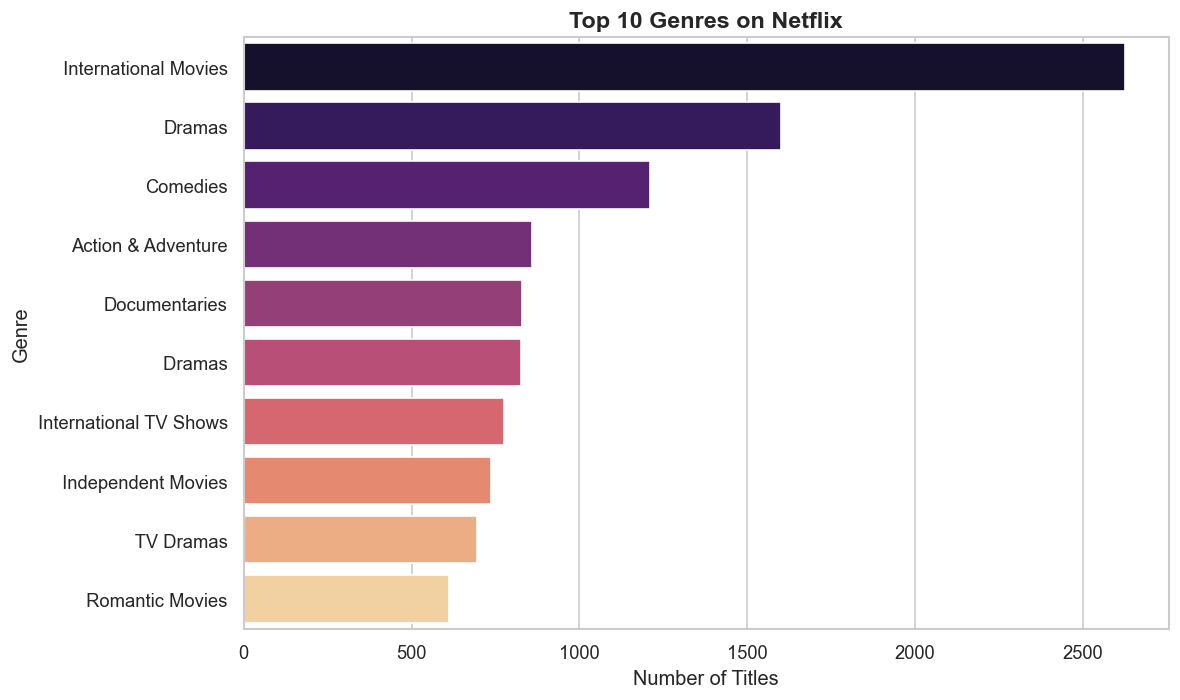

In [31]:
# 9) Top 10 Genres
plt.figure(figsize=(10,6))
top_genres = df["listed_in"].str.split(",").explode().value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma")
plt.title("Top 10 Genres on Netflix", fontsize=14, weight="bold")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig("images/top_genres.png", dpi=300)
plt.show()

<Figure size 1440x720 with 0 Axes>

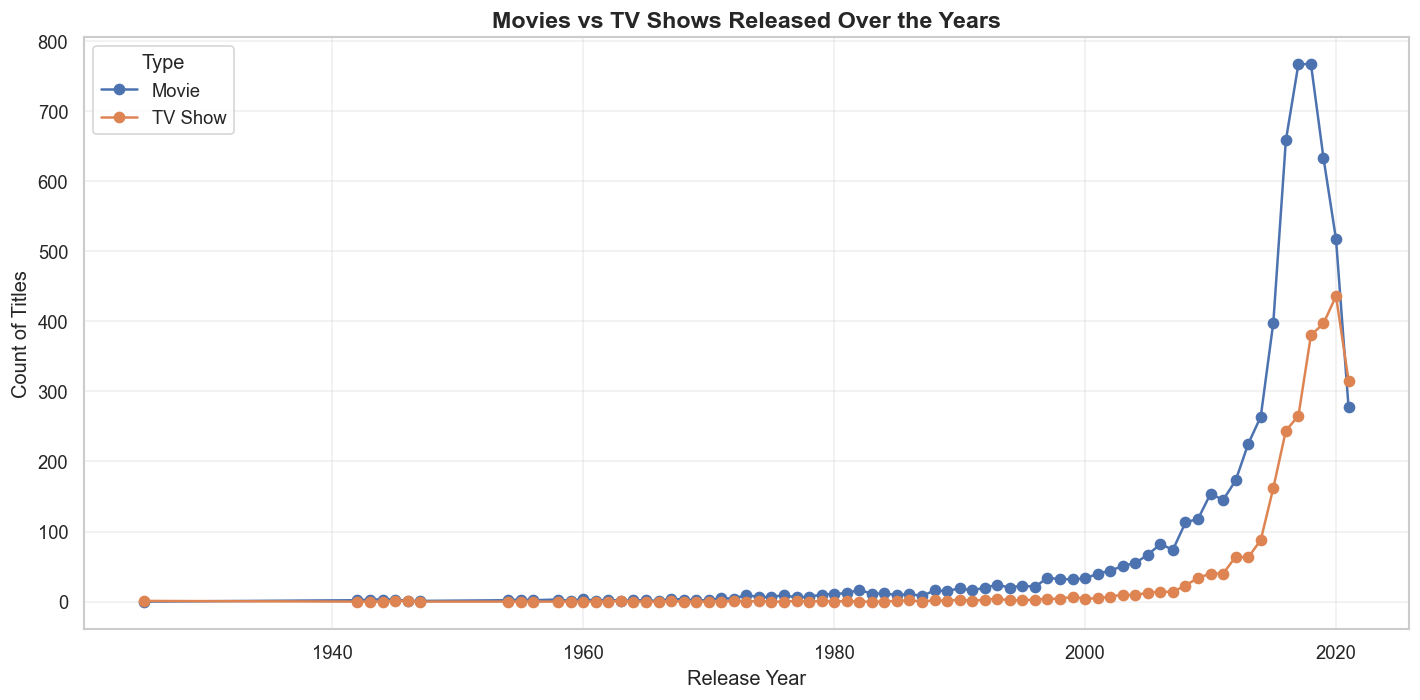

In [27]:
# 10) Movies vs TV Shows trend over years
plt.figure(figsize=(12,6))
pivot = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
pivot.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Movies vs TV Shows Released Over the Years", fontsize=14, weight="bold")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.legend(title="Type")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("images/movies_tv_trend.png", dpi=300)
plt.show()

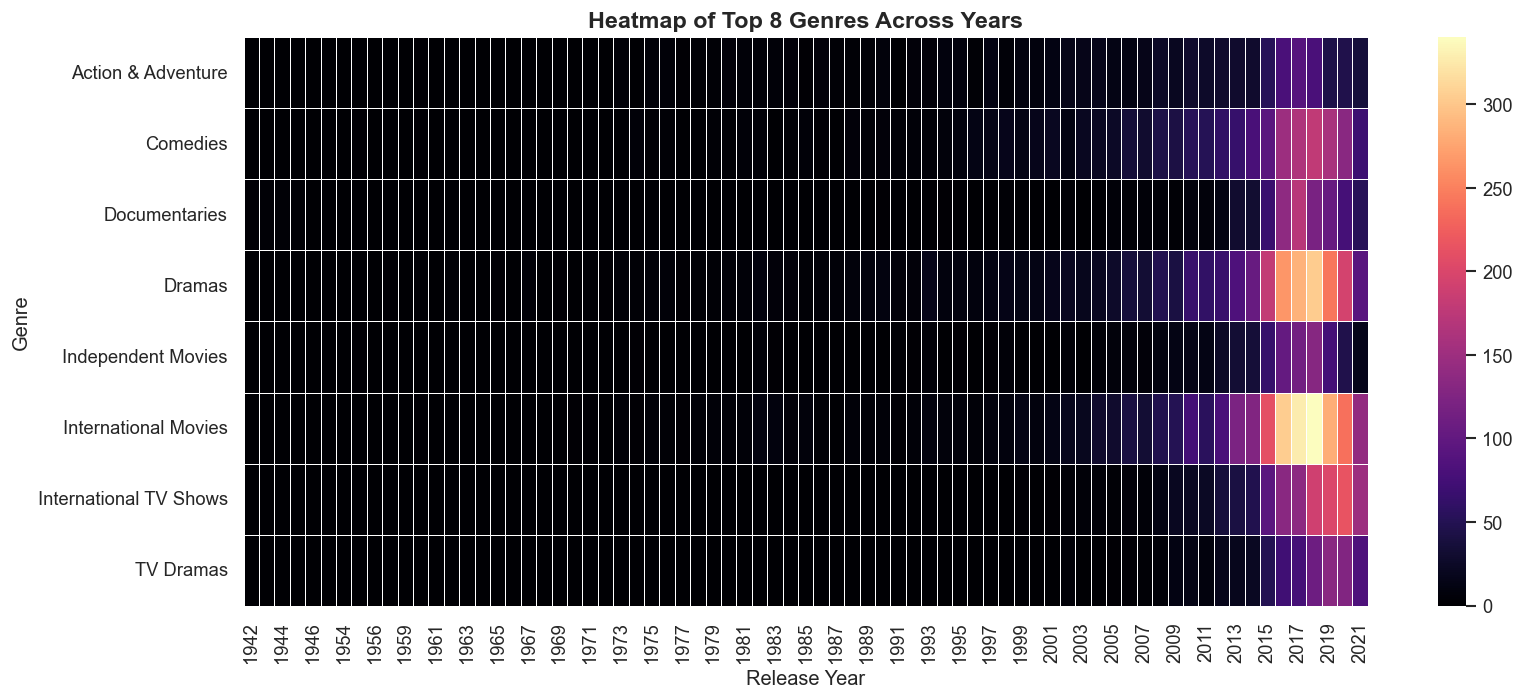

In [33]:
# 11) Heatmap of Top Genres across Years
import seaborn as sns

# pick top 8 genres
genre_series = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genre_series.value_counts().head(8).index.tolist()

# prepare data for heatmap
df_genres = df[['title', 'release_year', 'listed_in']].copy()
df_genres = df_genres.assign(genre=df_genres['listed_in'].str.split(',')).explode('genre')
df_genres['genre'] = df_genres['genre'].str.strip()
heat = df_genres[df_genres['genre'].isin(top_genres)].pivot_table(
    index='genre',
    columns='release_year',
    values='title',
    aggfunc='count'
).fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(heat, cmap='magma', linewidths=0.3)
plt.title("Heatmap of Top 8 Genres Across Years", fontsize=14, weight="bold")
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig("images/genre_heatmap.png", dpi=300)
plt.show()

In [35]:
!pip install wordcloud

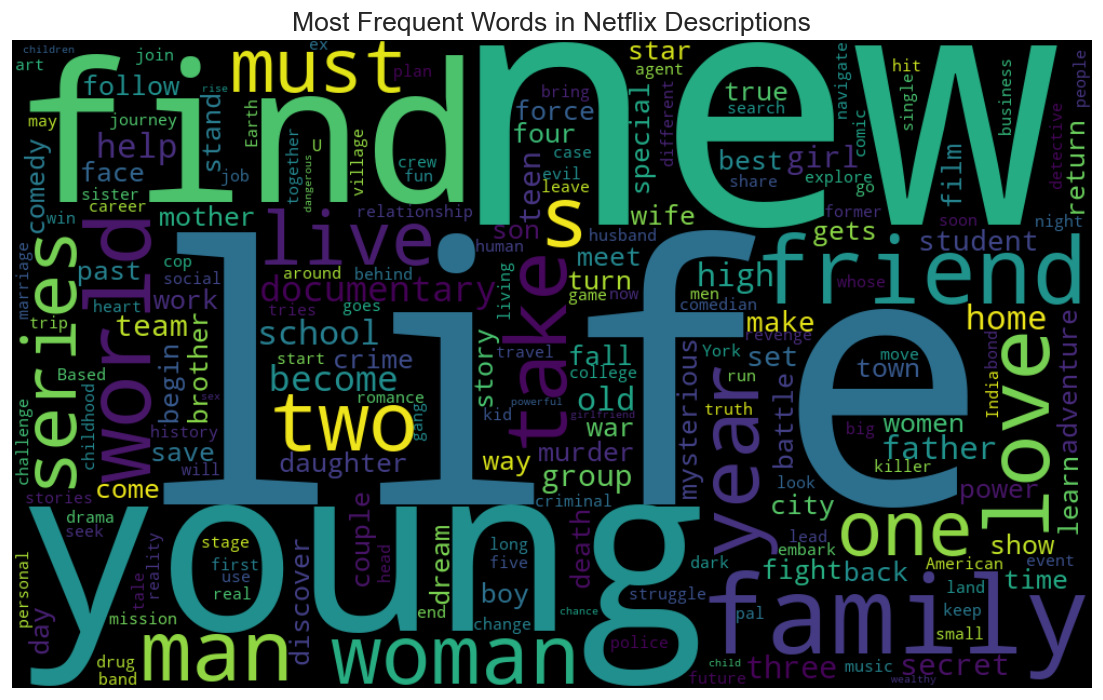

In [36]:
# 12)Word Cloud of Descriptions
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Make sure images folder exists
import os
os.makedirs("images", exist_ok=True)

# Combine all descriptions into one string
text = " ".join(desc for desc in df['description'].dropna())

# Generate WordCloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color="black",
    stopwords=STOPWORDS,
    colormap="viridis",
    collocations=False
).generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Netflix Descriptions", fontsize=16)
plt.tight_layout()

# Save
plt.savefig("images/netflix_wordcloud.png", dpi=300, bbox_inches="tight")
plt.show()

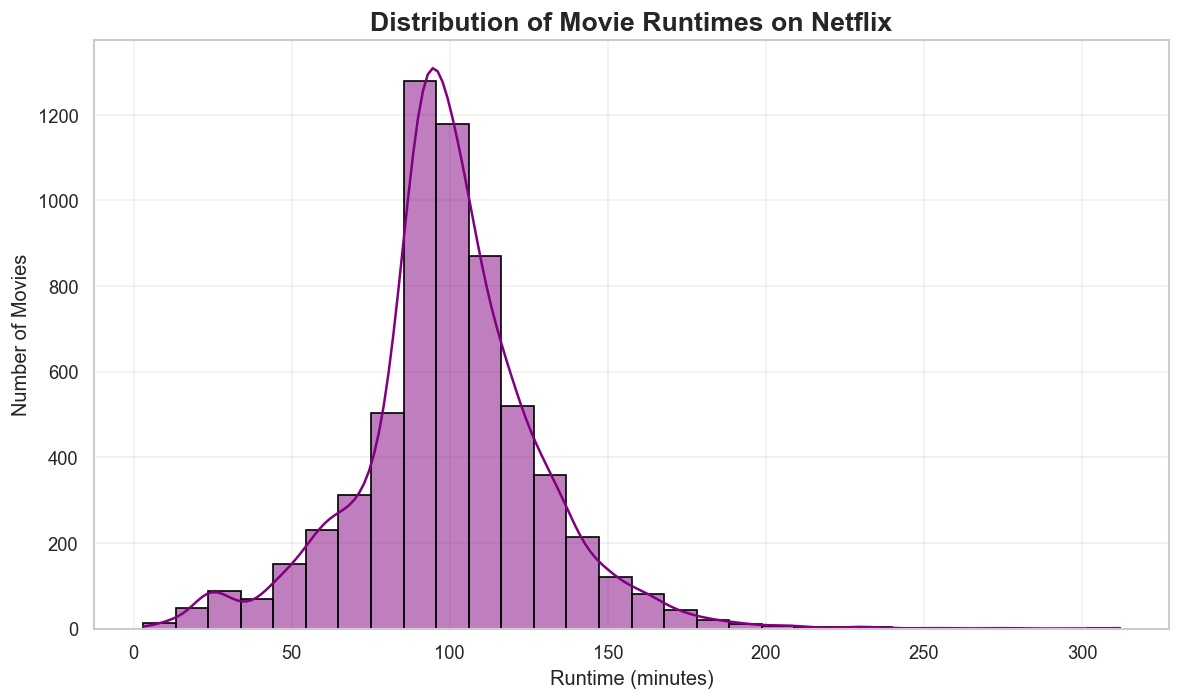

In [37]:
# 13)Movie Runtime Distribution
df_movies = df[df['type'] == "Movie"].copy()

# Extract runtime in minutes (drop " min")
df_movies['runtime'] = df_movies['duration'].str.replace(" min", "", regex=False).astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(df_movies['runtime'], bins=30, kde=True, color="purple", edgecolor="black")
plt.title("Distribution of Movie Runtimes on Netflix", fontsize=16, fontweight="bold")
plt.xlabel("Runtime (minutes)", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save
os.makedirs("images", exist_ok=True)
plt.savefig("images/movie_runtime_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

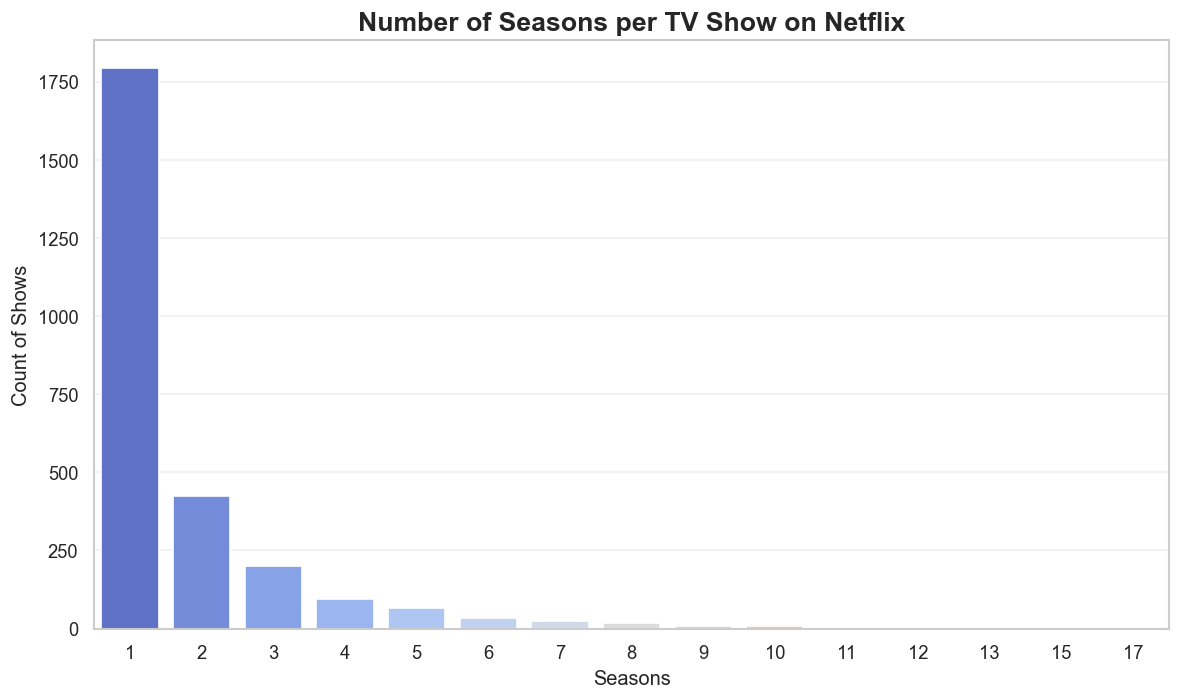

In [38]:
# 14)TV Show Seasons Distribution
df_tv = df[df['type'] == "TV Show"].copy()

# Extract number of seasons
df_tv['seasons'] = (
    df_tv['duration']
    .str.replace(" Season", "", regex=False)
    .str.replace("s", "", regex=False)
    .astype(int)
)

plt.figure(figsize=(10, 6))
sns.countplot(
    x='seasons',
    data=df_tv,
    palette="coolwarm",
    order=sorted(df_tv['seasons'].unique())
)
plt.title("Number of Seasons per TV Show on Netflix", fontsize=16, fontweight="bold")
plt.xlabel("Seasons", fontsize=12)
plt.ylabel("Count of Shows", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()

# Save
plt.savefig("images/tv_show_seasons.png", dpi=300, bbox_inches="tight")
plt.show()

In [39]:
# 15)Save cleaned data
df.to_csv("../data/netflix_cleaned.csv", index=False)
print("Saved cleaned dataset.")

Saved cleaned dataset.
